In [34]:
df= pd.read_csv('netflix1.csv')
print(df.head)
df.info()

<bound method NDFrame.head of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   du

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [35]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [13]:
df.drop_duplicates(inplace=True)

In [41]:
# Netflix Data: Cleaning, Analysis, and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print(" WordCloud not installed. Word cloud visualizations will be skipped.")
    print(" To install: pip install wordcloud")

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [49]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class NetflixDataAnalyzer:
    def __init__(self, csv_path):
        """Initialize the Netflix Data Analyzer with dataset path"""
        self.csv_path = csv_path
        self.data = None
        self.cleaned_data = None
        
    def load_data(self):
        """Load the Netflix dataset"""
        try:
            self.data = pd.read_csv(self.csv_path)
            print("Dataset loaded successfully!")
            print(f"Dataset shape: {self.data.shape}")
            print("\n First few rows:")
            print(self.data.head())
            return self.data
        except FileNotFoundError:
            print(" File not found! Please check the file path.")
            return None
    
    def data_overview(self):
        """Get basic information about the dataset"""
        if self.data is None:
            print(" Please load data first!")
            return
        
        print("\n" + "="*50)
        print("DATASET OVERVIEW")
        print("="*50)
        
        print(f"Dataset shape: {self.data.shape}")
        print(f"Memory usage: {self.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        print("\n Data Types:")
        print(self.data.dtypes)
        
        print("\n Missing Values:")
        missing_values = self.data.isnull().sum()
        print(missing_values[missing_values > 0])
        
        print("\n Basic Statistics:")
        print(self.data.describe(include='all'))
    
    def clean_data(self):
        """Clean the Netflix dataset"""
        if self.data is None:
            print("❌ Please load data first!")
            return
        
        print("\n" + "="*50)
        print("🧹 DATA CLEANING")
        print("="*50)
        
        # Create a copy for cleaning
        self.cleaned_data = self.data.copy()
        
        # 1. Remove duplicates
        initial_shape = self.cleaned_data.shape[0]
        self.cleaned_data = self.cleaned_data.drop_duplicates()
        duplicates_removed = initial_shape - self.cleaned_data.shape[0]
        print(f"Removed {duplicates_removed} duplicate rows")
        
        # 2. Handle missing values
        print("\n🔧 Handling missing values...")
        
        # Fill missing directors with 'Unknown'
        if 'director' in self.cleaned_data.columns:
            missing_directors = self.cleaned_data['director'].isnull().sum()
            self.cleaned_data['director'].fillna('Unknown', inplace=True)
            print(f" Filled {missing_directors} missing director values")
        
        # Fill missing countries with 'Not Given'
        if 'country' in self.cleaned_data.columns:
            missing_countries = self.cleaned_data['country'].isnull().sum()
            self.cleaned_data['country'].fillna('Not Given', inplace=True)
            print(f" Filled {missing_countries} missing country values")
        
        # 3. Convert date_added to datetime
        if 'date_added' in self.cleaned_data.columns:
            self.cleaned_data['date_added'] = pd.to_datetime(self.cleaned_data['date_added'], errors='coerce')
            print(" Converted date_added to datetime format")
        
        # 4. Extract date components
        if 'date_added' in self.cleaned_data.columns:
            self.cleaned_data['year_added'] = self.cleaned_data['date_added'].dt.year
            self.cleaned_data['month_added'] = self.cleaned_data['date_added'].dt.month
            self.cleaned_data['day_added'] = self.cleaned_data['date_added'].dt.day
            print(" Extracted year, month, and day components")
        
        # 5. Clean genres (listed_in column)
        if 'listed_in' in self.cleaned_data.columns:
            self.cleaned_data['genres'] = self.cleaned_data['listed_in'].apply(
                lambda x: [genre.strip() for genre in str(x).split(',')] if pd.notna(x) else []
            )
            print(" Processed genres column")
        
        print(f"\n Data cleaning completed! Final shape: {self.cleaned_data.shape}")
        return self.cleaned_data
    
    def analyze_content_distribution(self):
        """Analyze the distribution of content types"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print(" CONTENT TYPE ANALYSIS")
        print("="*50)
        
        # Content type distribution
        type_counts = self.cleaned_data['type'].value_counts()
        print("Content Distribution:")
        print(type_counts)
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot
        sns.countplot(data=self.cleaned_data, x='type', ax=axes[0], palette='viridis')
        axes[0].set_title('Content Distribution - Bar Plot', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Content Type')
        axes[0].set_ylabel('Count')
        
        # Pie chart
        axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
                   startangle=90, colors=['#FF6B6B', '#4ECDC4'])
        axes[1].set_title('Content Distribution - Pie Chart', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return type_counts
    
    def analyze_ratings(self):
        """Analyze content ratings"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print(" RATINGS ANALYSIS")
        print("="*50)
        
        rating_counts = self.cleaned_data['rating'].value_counts()
        print("Top 10 Ratings:")
        print(rating_counts.head(10))
        
        # Visualization
        fig, axes = plt.subplots(2, 1, figsize=(15, 12))
        
        # Bar plot for all ratings
        rating_counts.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.8)
        axes[0].set_title('Distribution of Content Ratings', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Rating')
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie chart for top 8 ratings
        top_8_ratings = rating_counts.head(8)
        axes[1].pie(top_8_ratings.values, labels=top_8_ratings.index, autopct='%1.1f%%', 
                   startangle=90)
        axes[1].set_title('Top 8 Content Ratings Distribution', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return rating_counts
    
    def analyze_countries(self):
        """Analyze content by country"""
        if self.cleaned_data is None:
            print(" Please clean data first!")
            return
        
        print("\n" + "="*50)
        print(" COUNTRY ANALYSIS")
        print("="*50)
        
        country_counts = self.cleaned_data['country'].value_counts()
        print("Top 15 Countries:")
        print(country_counts.head(15))
        
        # Visualization
        plt.figure(figsize=(15, 8))
        top_15_countries = country_counts.head(15)
        
        bars = plt.bar(range(len(top_15_countries)), top_15_countries.values, 
                      color=plt.cm.viridis(np.linspace(0, 1, len(top_15_countries))))
        
        plt.title('Top 15 Countries with Most Content on Netflix', fontsize=16, fontweight='bold')
        plt.xlabel('Country')
        plt.ylabel('Number of Titles')
        plt.xticks(range(len(top_15_countries)), top_15_countries.index, rotation=45, ha='right')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
                    str(top_15_countries.values[i]), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        return country_counts
    
    def analyze_temporal_trends(self):
        """Analyze content addition trends over time"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print(" TEMPORAL TRENDS ANALYSIS")
        print("="*50)
        
        # Filter out rows with missing dates
        data_with_dates = self.cleaned_data.dropna(subset=['year_added'])
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        
        # 1. Yearly content addition
        yearly_counts = data_with_dates['year_added'].value_counts().sort_index()
        axes[0,0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=3, markersize=8)
        axes[0,0].set_title('Content Added to Netflix Over Years', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Year')
        axes[0,0].set_ylabel('Number of Titles Added')
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Monthly trends
        monthly_counts = data_with_dates['month_added'].value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        axes[0,1].bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], 
                     color='coral', alpha=0.8)
        axes[0,1].set_title('Content Addition by Month', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Month')
        axes[0,1].set_ylabel('Number of Titles Added')
        axes[0,1].set_xticks(range(1, 13))
        axes[0,1].set_xticklabels(month_names)
        
        # 3. Movies vs TV Shows over time
        movies_yearly = data_with_dates[data_with_dates['type'] == 'Movie']['year_added'].value_counts().sort_index()
        tv_yearly = data_with_dates[data_with_dates['type'] == 'TV Show']['year_added'].value_counts().sort_index()
        
        axes[1,0].plot(movies_yearly.index, movies_yearly.values, marker='o', label='Movies', linewidth=3)
        axes[1,0].plot(tv_yearly.index, tv_yearly.values, marker='s', label='TV Shows', linewidth=3)
        axes[1,0].set_title('Movies vs TV Shows Added Over Time', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Year')
        axes[1,0].set_ylabel('Number of Titles')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 4. Release year vs Addition year
        release_vs_added = data_with_dates.groupby(['release_year', 'year_added']).size().reset_index(name='count')
        pivot_data = release_vs_added.pivot(index='release_year', columns='year_added', values='count').fillna(0)
        
        # Show only recent years for clarity
        recent_pivot = pivot_data.loc[2000:, 2015:]
        sns.heatmap(recent_pivot, cmap='YlOrRd', ax=axes[1,1], cbar_kws={'label': 'Number of Titles'})
        axes[1,1].set_title('Release Year vs Addition Year Heatmap', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Year Added to Netflix')
        axes[1,1].set_ylabel('Release Year')
        
        plt.tight_layout()
        plt.show()
    
    def analyze_genres(self):
        """Analyze popular genres"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print("🎭 GENRE ANALYSIS")
        print("="*50)
        
        # Extract all genres
        all_genres = []
        for genres_list in self.cleaned_data['genres']:
            all_genres.extend(genres_list)
        
        genre_counts = pd.Series(all_genres).value_counts()
        print("Top 15 Genres:")
        print(genre_counts.head(15))
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        
        # 1. Top genres overall
        top_15_genres = genre_counts.head(15)
        axes[0,0].barh(range(len(top_15_genres)), top_15_genres.values, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(top_15_genres))))
        axes[0,0].set_yticks(range(len(top_15_genres)))
        axes[0,0].set_yticklabels(top_15_genres.index)
        axes[0,0].set_title('Top 15 Genres on Netflix', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Number of Titles')
        
        # 2. Movies vs TV Shows genres
        movie_genres = []
        tv_genres = []
        
        for idx, row in self.cleaned_data.iterrows():
            if row['type'] == 'Movie':
                movie_genres.extend(row['genres'])
            else:
                tv_genres.extend(row['genres'])
        
        movie_genre_counts = pd.Series(movie_genres).value_counts().head(10)
        tv_genre_counts = pd.Series(tv_genres).value_counts().head(10)
        
        x = np.arange(len(movie_genre_counts))
        width = 0.35
        
        axes[0,1].bar(x - width/2, movie_genre_counts.values, width, label='Movies', alpha=0.8)
        axes[0,1].bar(x + width/2, tv_genre_counts.values, width, label='TV Shows', alpha=0.8)
        axes[0,1].set_title('Top 10 Genres: Movies vs TV Shows', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Genres')
        axes[0,1].set_ylabel('Count')
        axes[0,1].set_xticks(x)
        axes[0,1].set_xticklabels(movie_genre_counts.index, rotation=45, ha='right')
        axes[0,1].legend()
        
        # 3. Genre trends over time
        genre_year_data = []
        for idx, row in self.cleaned_data.iterrows():
            if pd.notna(row['year_added']):
                for genre in row['genres']:
                    genre_year_data.append({'genre': genre, 'year': row['year_added']})
        
        genre_year_df = pd.DataFrame(genre_year_data)
        top_5_genres = genre_counts.head(5).index
        
        for genre in top_5_genres:
            genre_yearly = genre_year_df[genre_year_df['genre'] == genre]['year'].value_counts().sort_index()
            axes[1,0].plot(genre_yearly.index, genre_yearly.values, marker='o', label=genre, linewidth=2)
        
        axes[1,0].set_title('Top 5 Genres Trend Over Time', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Year')
        axes[1,0].set_ylabel('Number of Titles')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 4. Genre wordcloud
        genre_text = ' '.join(all_genres)
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             colormap='viridis').generate(genre_text)
        axes[1,1].imshow(wordcloud, interpolation='bilinear')
        axes[1,1].axis('off')
        axes[1,1].set_title('Genre Word Cloud', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return genre_counts
    
    def analyze_directors(self):
        """Analyze top directors"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print("🎬 DIRECTORS ANALYSIS")
        print("="*50)
        
        # Filter out unknown directors
        directors_data = self.cleaned_data[self.cleaned_data['director'] != 'Unknown']
        director_counts = directors_data['director'].value_counts()
        
        print("Top 20 Directors:")
        print(director_counts.head(20))
        
        # Visualization
        fig, axes = plt.subplots(2, 1, figsize=(15, 12))
        
        # Top 15 directors
        top_15_directors = director_counts.head(15)
        bars = axes[0].barh(range(len(top_15_directors)), top_15_directors.values, 
                           color=plt.cm.plasma(np.linspace(0, 1, len(top_15_directors))))
        axes[0].set_yticks(range(len(top_15_directors)))
        axes[0].set_yticklabels(top_15_directors.index)
        axes[0].set_title('Top 15 Directors on Netflix', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Number of Titles')
        
        # Add value labels
        for i, bar in enumerate(bars):
            axes[0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                        str(top_15_directors.values[i]), va='center')
        
        # Directors by content type
        director_type_data = directors_data.groupby(['director', 'type']).size().unstack(fill_value=0)
        top_10_directors = director_counts.head(10).index
        director_type_subset = director_type_data.loc[top_10_directors]
        
        director_type_subset.plot(kind='bar', stacked=True, ax=axes[1], 
                                 color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
        axes[1].set_title('Top 10 Directors: Movies vs TV Shows', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Director')
        axes[1].set_ylabel('Number of Titles')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Content Type')
        
        plt.tight_layout()
        plt.show()
        
        return director_counts
    
    def create_word_clouds(self):
        """Create word clouds for titles and descriptions"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*50)
        print("☁️ WORD CLOUD ANALYSIS")
        print("="*50)
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        
        # 1. Movie titles word cloud
        movie_titles = self.cleaned_data[self.cleaned_data['type'] == 'Movie']['title']
        movie_text = ' '.join(movie_titles.astype(str))
        movie_wordcloud = WordCloud(width=400, height=300, background_color='white', 
                                   colormap='Reds').generate(movie_text)
        axes[0,0].imshow(movie_wordcloud, interpolation='bilinear')
        axes[0,0].axis('off')
        axes[0,0].set_title('Movie Titles Word Cloud', fontsize=14, fontweight='bold')
        
        # 2. TV Show titles word cloud
        tv_titles = self.cleaned_data[self.cleaned_data['type'] == 'TV Show']['title']
        tv_text = ' '.join(tv_titles.astype(str))
        tv_wordcloud = WordCloud(width=400, height=300, background_color='white', 
                                colormap='Blues').generate(tv_text)
        axes[0,1].imshow(tv_wordcloud, interpolation='bilinear')
        axes[0,1].axis('off')
        axes[0,1].set_title('TV Show Titles Word Cloud', fontsize=14, fontweight='bold')
        
        # 3. Directors word cloud
        directors_text = ' '.join(self.cleaned_data['director'][self.cleaned_data['director'] != 'Unknown'].astype(str))
        directors_wordcloud = WordCloud(width=400, height=300, background_color='white', 
                                       colormap='Greens').generate(directors_text)
        axes[1,0].imshow(directors_wordcloud, interpolation='bilinear')
        axes[1,0].axis('off')
        axes[1,0].set_title('Directors Word Cloud', fontsize=14, fontweight='bold')
        
        # 4. Countries word cloud
        countries_text = ' '.join(self.cleaned_data['country'][self.cleaned_data['country'] != 'Not Given'].astype(str))
        countries_wordcloud = WordCloud(width=400, height=300, background_color='white', 
                                       colormap='Purples').generate(countries_text)
        axes[1,1].imshow(countries_wordcloud, interpolation='bilinear')
        axes[1,1].axis('off')
        axes[1,1].set_title('Countries Word Cloud', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def generate_insights(self):
        """Generate key insights from the analysis"""
        if self.cleaned_data is None:
            print("❌ Please clean data first!")
            return
        
        print("\n" + "="*60)
        print("🔍 KEY INSIGHTS FROM NETFLIX DATA ANALYSIS")
        print("="*60)
        
        insights = []
        
        # Content type insights
        type_counts = self.cleaned_data['type'].value_counts()
        movie_percentage = (type_counts['Movie'] / len(self.cleaned_data)) * 100
        insights.append(f"📺 Movies make up {movie_percentage:.1f}% of Netflix content")
        
        # Country insights
        country_counts = self.cleaned_data['country'].value_counts()
        top_country = country_counts.index[0]
        top_country_count = country_counts.iloc[0]
        insights.append(f"🌍 {top_country} has the most content with {top_country_count} titles")
        
        # Rating insights
        rating_counts = self.cleaned_data['rating'].value_counts()
        top_rating = rating_counts.index[0]
        insights.append(f"⭐ Most common rating is '{top_rating}' with {rating_counts.iloc[0]} titles")
        
        # Temporal insights
        if 'year_added' in self.cleaned_data.columns:
            data_with_dates = self.cleaned_data.dropna(subset=['year_added'])
            if not data_with_dates.empty:
                yearly_counts = data_with_dates['year_added'].value_counts()
                peak_year = yearly_counts.index[0]
                insights.append(f"📅 Peak content addition year was {int(peak_year)} with {yearly_counts.iloc[0]} titles")
        
        # Genre insights
        all_genres = []
        for genres_list in self.cleaned_data['genres']:
            all_genres.extend(genres_list)
        if all_genres:
            genre_counts = pd.Series(all_genres).value_counts()
            top_genre = genre_counts.index[0]
            insights.append(f"🎭 Most popular genre is '{top_genre}' with {genre_counts.iloc[0]} appearances")
        
        # Director insights
        directors_data = self.cleaned_data[self.cleaned_data['director'] != 'Unknown']
        if not directors_data.empty:
            director_counts = directors_data['director'].value_counts()
            top_director = director_counts.index[0]
            insights.append(f"🎬 Most prolific director is '{top_director}' with {director_counts.iloc[0]} titles")
        
        # Duration insights (if available)
        if 'release_year' in self.cleaned_data.columns:
            oldest_content = self.cleaned_data['release_year'].min()
            newest_content = self.cleaned_data['release_year'].max()
            insights.append(f"📚 Content spans from {int(oldest_content)} to {int(newest_content)}")
        
        # Print insights
        for i, insight in enumerate(insights, 1):
            print(f"{i}. {insight}")
        
        print(f"\n✨ Total dataset contains {len(self.cleaned_data)} titles after cleaning")
        print("="*60)
    
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        print("🚀 Starting Netflix Data Analysis Pipeline")
        print("="*60)
        
        # Step 1: Load data
        if self.load_data() is None:
            return
        
        # Step 2: Data overview
        self.data_overview()
        
        # Step 3: Clean data
        self.clean_data()
        
        # Step 4: Run all analyses
        self.analyze_content_distribution()
        self.analyze_ratings()
        self.analyze_countries()
        self.analyze_temporal_trends()
        self.analyze_genres()
        self.analyze_directors()
        self.create_word_clouds()
        
        # Step 5: Generate insights
        self.generate_insights()
        
        print("\n🎉 Analysis completed successfully!")
        print("Next steps for ML: Feature engineering, recommendation systems, trend prediction")

"""
To run this Netflix data analysis:

1. Make sure you have the required libraries installed:
   pip install pandas numpy matplotlib seaborn wordcloud

2. Download the Netflix dataset (netflix_titles.csv or similar)

3. Initialize and run the analyzer:
   analyzer = NetflixDataAnalyzer('path/to/your/netflix_titles.csv')
   analyzer.run_complete_analysis()

4. Or run individual analyses:
   analyzer.load_data()
   analyzer.clean_data()
   analyzer.analyze_content_distribution()
   analyzer.analyze_genres()
   # ... and so on

The analyzer will generate comprehensive visualizations and insights about:
- Content type distribution (Movies vs TV Shows)
- Rating distributions
- Geographic content distribution
- Temporal trends and patterns
- Genre analysis and popularity
- Director statistics
- Word clouds for various categories
- Key insights and recommendations for ML applications
"""


🚀 Starting Netflix Data Analysis Pipeline
✅ Dataset loaded successfully!
Dataset shape: (8790, 10)

📊 First few rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0              

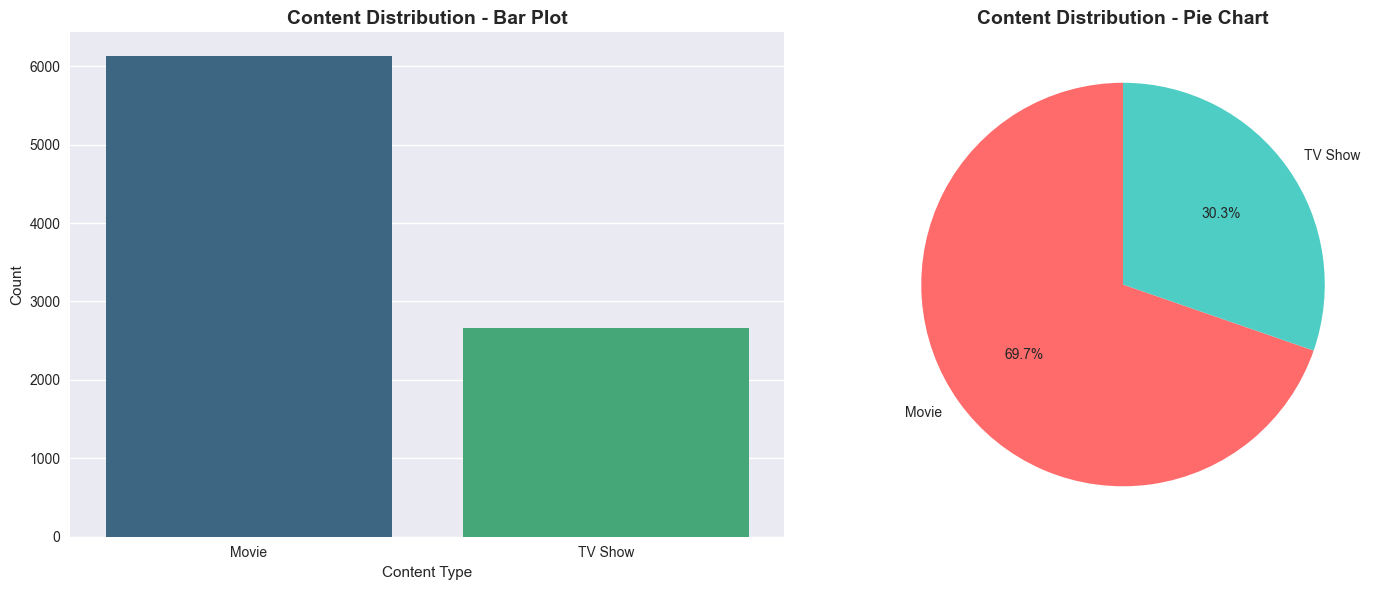


⭐ RATINGS ANALYSIS
Top 10 Ratings:
rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


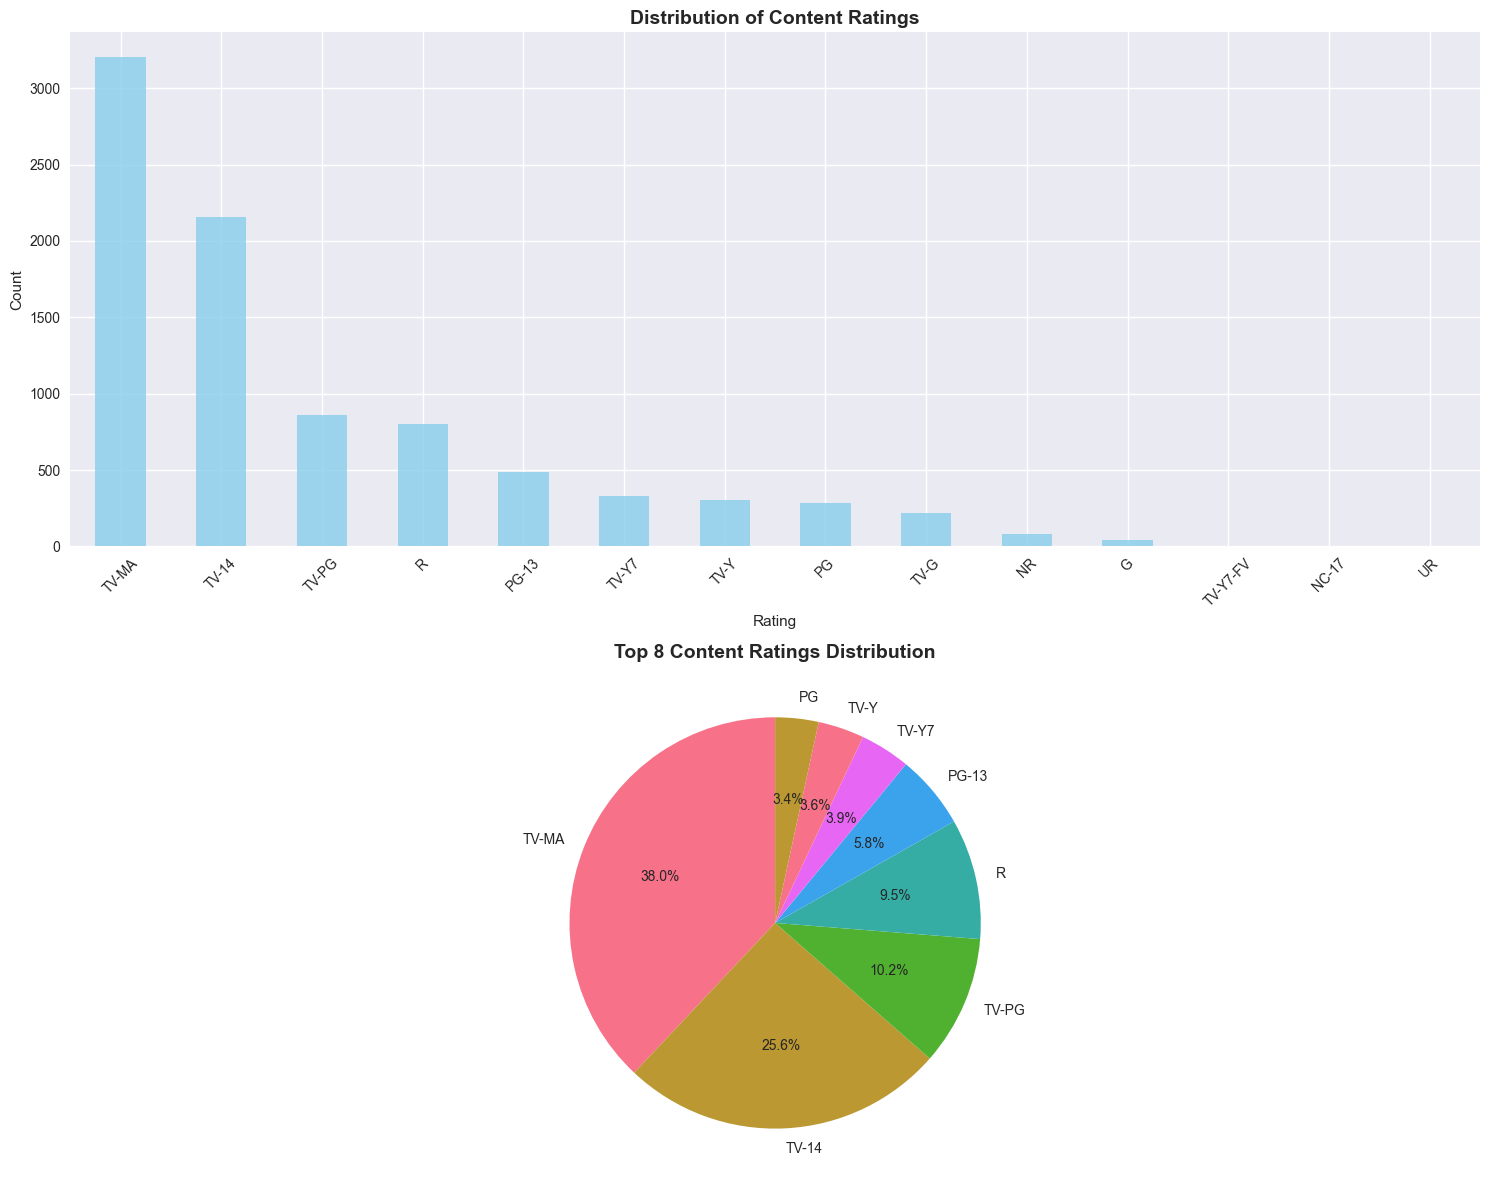


🌍 COUNTRY ANALYSIS
Top 15 Countries:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Name: count, dtype: int64


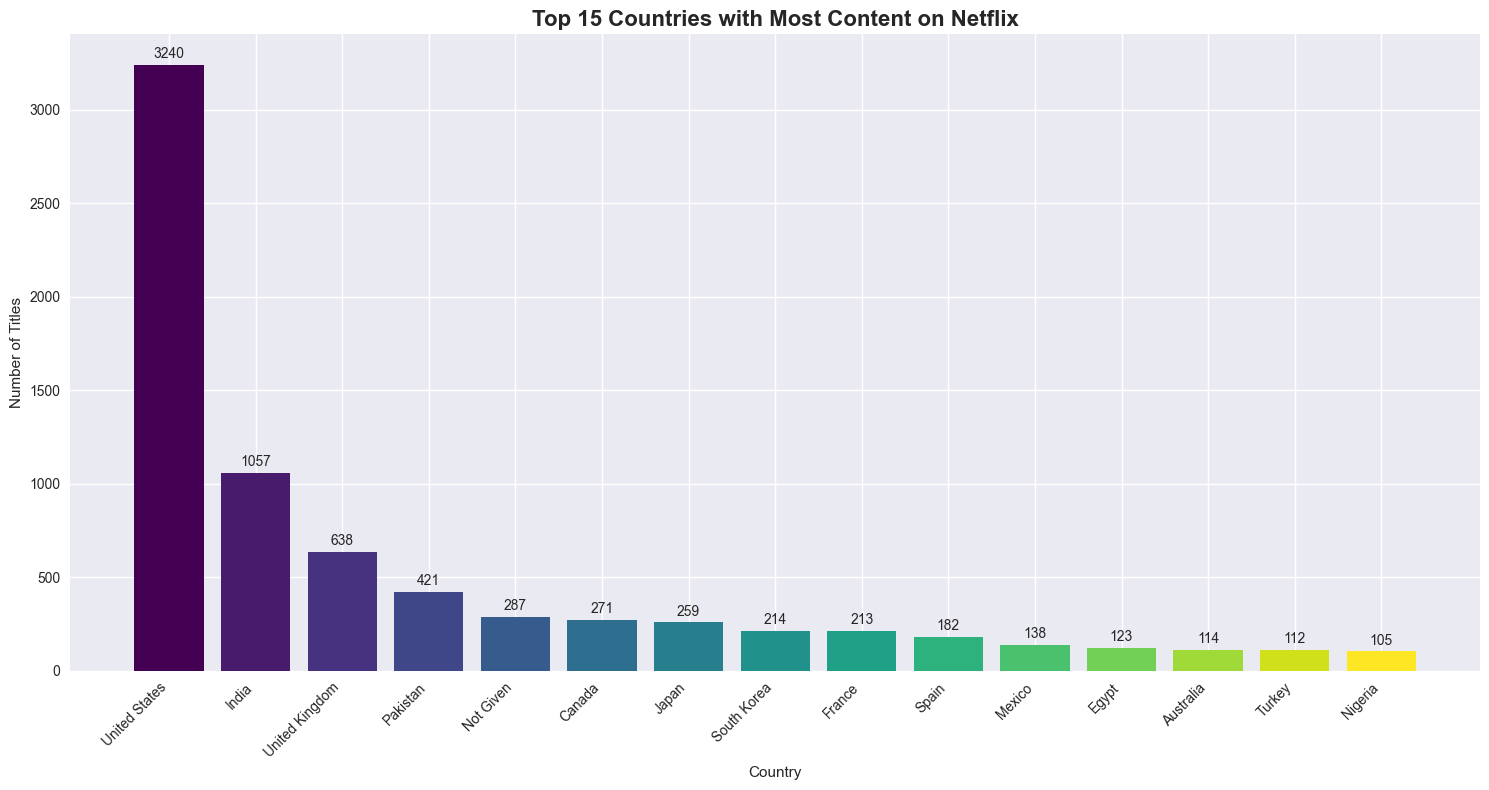


📅 TEMPORAL TRENDS ANALYSIS


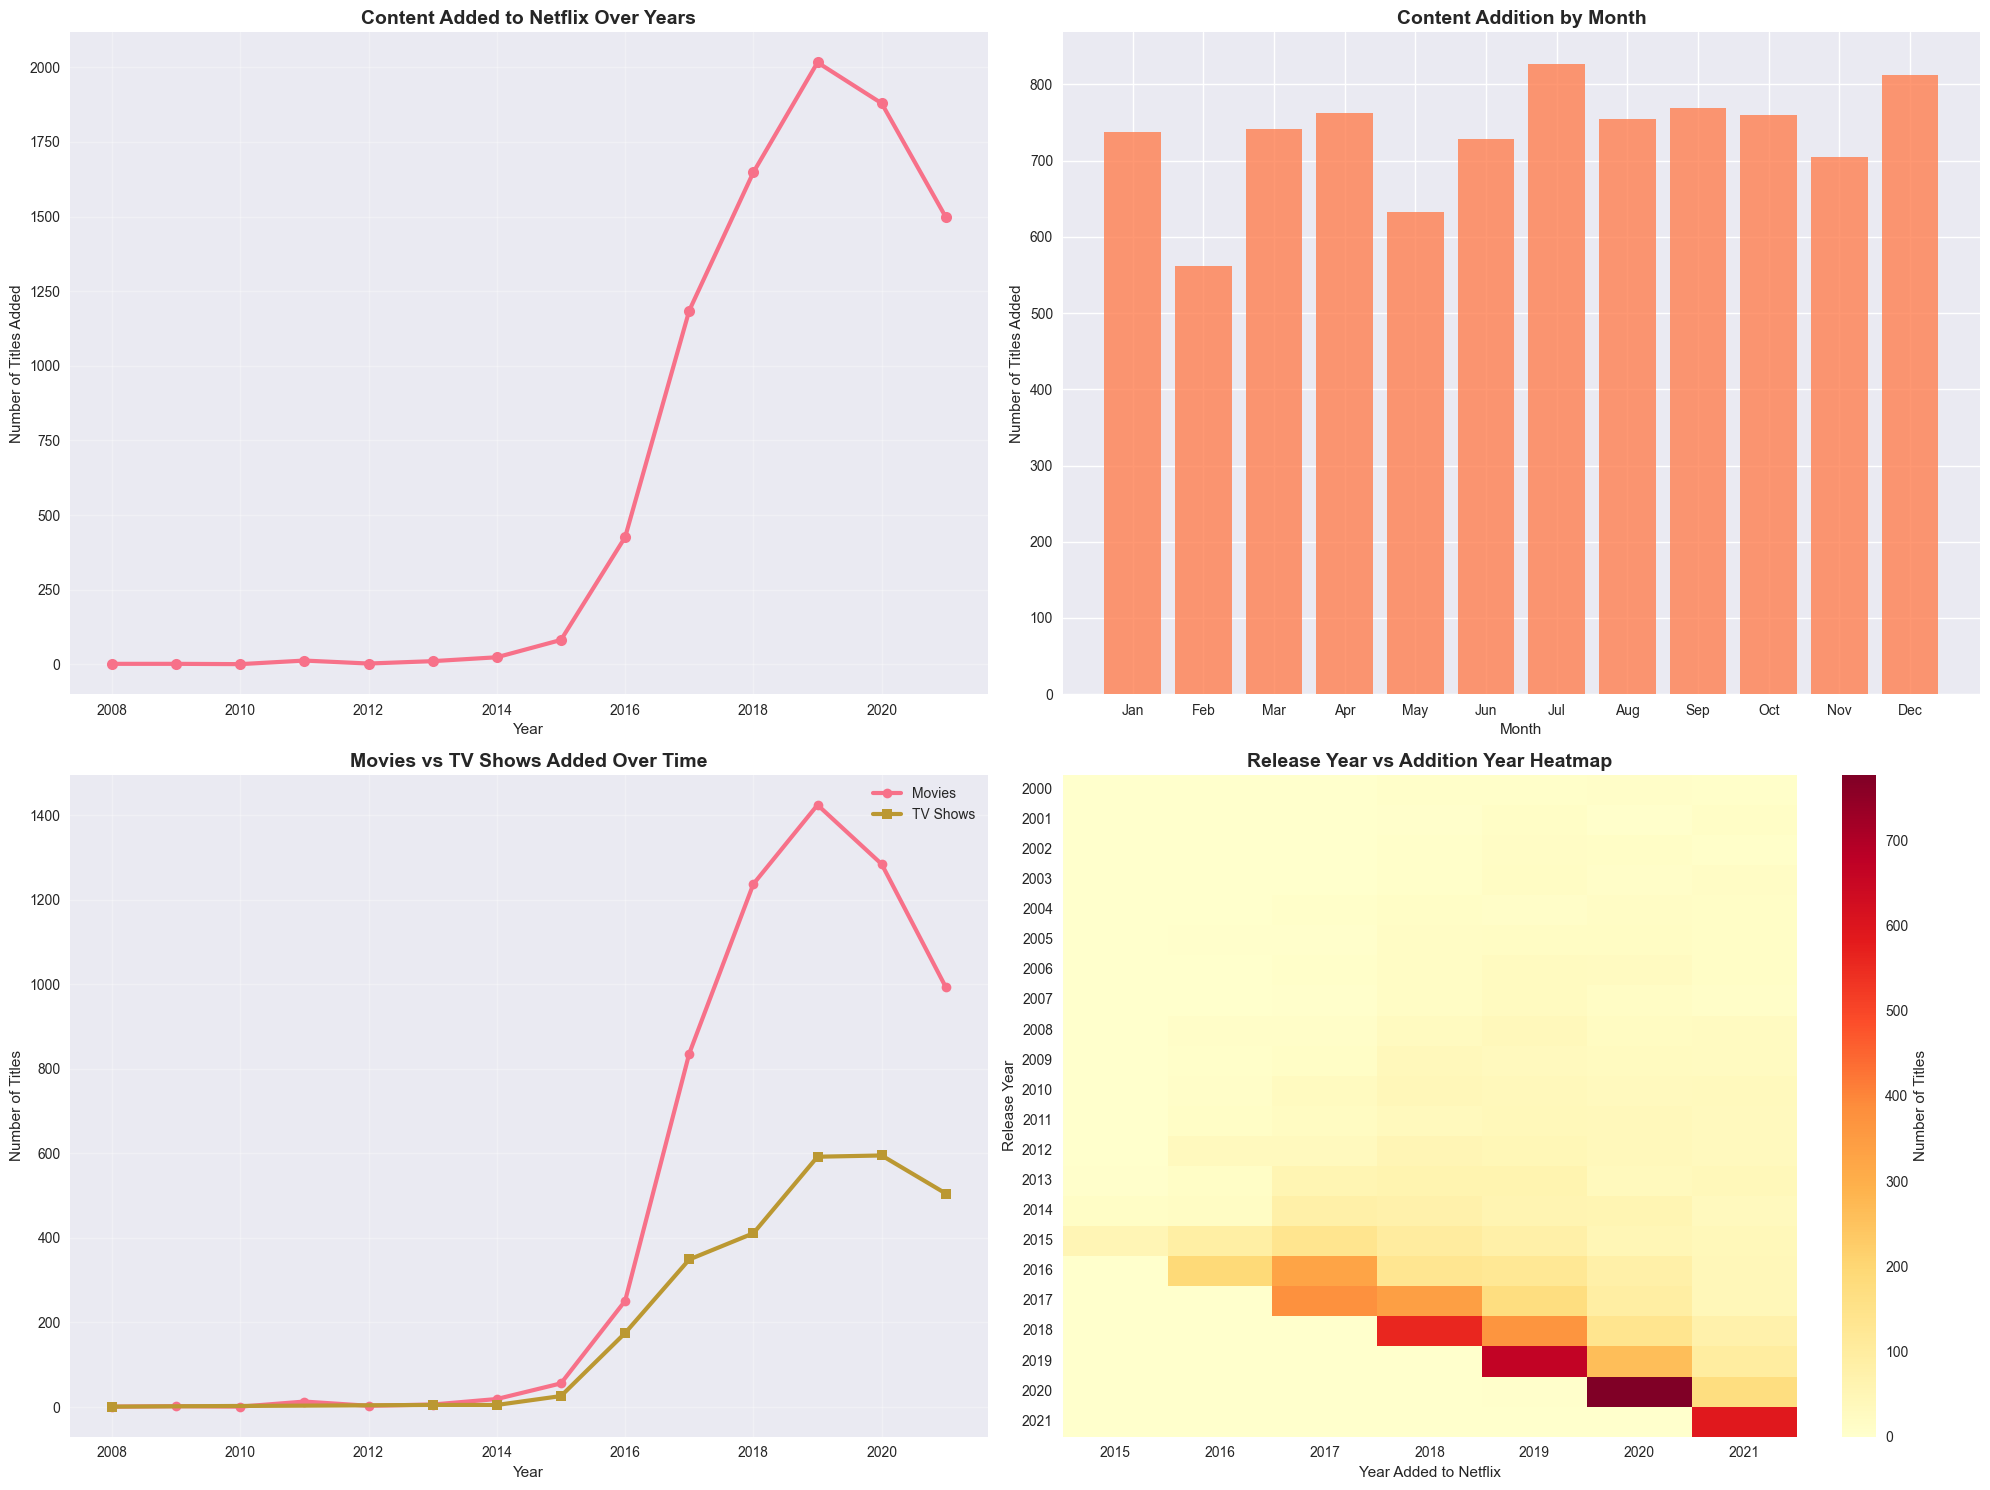


🎭 GENRE ANALYSIS
Top 15 Genres:
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
TV Comedies                  573
Crime TV Shows               469
Kids' TV                     448
Docuseries                   394
Name: count, dtype: int64


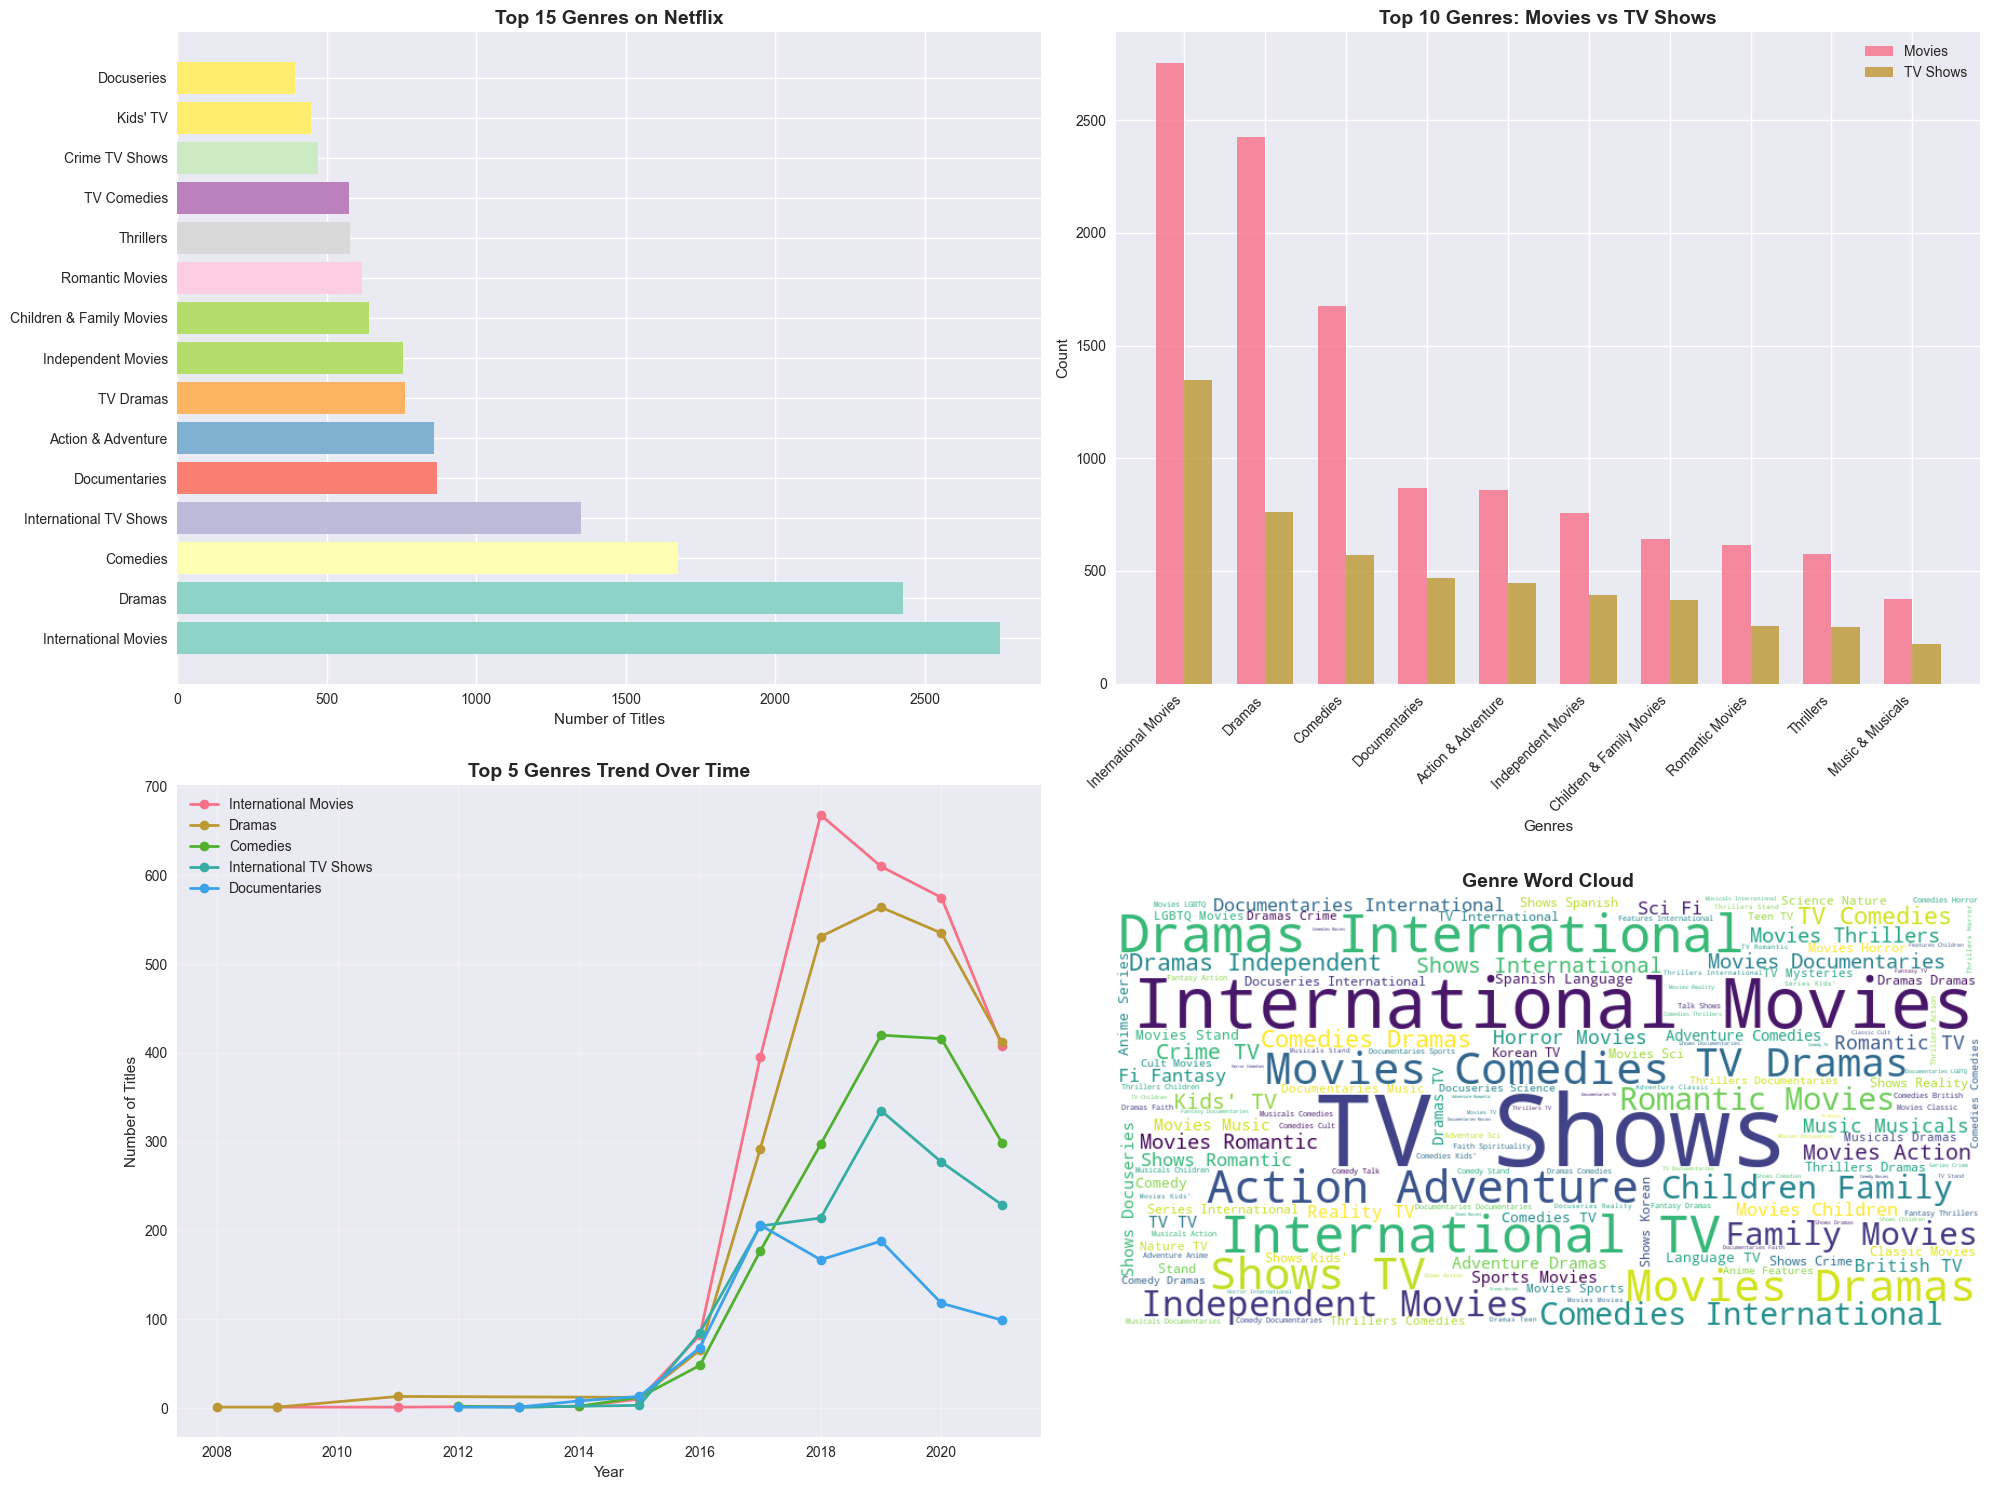


🎬 DIRECTORS ANALYSIS
Top 20 Directors:
director
Not Given                       2588
Rajiv Chilaka                     20
Alastair Fothergill               18
Raúl Campos, Jan Suter            18
Suhas Kadav                       16
Marcus Raboy                      16
Jay Karas                         14
Cathy Garcia-Molina               13
Martin Scorsese                   12
Youssef Chahine                   12
Jay Chapman                       12
Steven Spielberg                  11
Mark Thornton, Todd Kauffman      10
Don Michael Paul                  10
David Dhawan                       9
Ryan Polito                        8
Johnnie To                         8
Lance Bangs                        8
Troy Miller                        8
Robert Rodriguez                   8
Name: count, dtype: int64


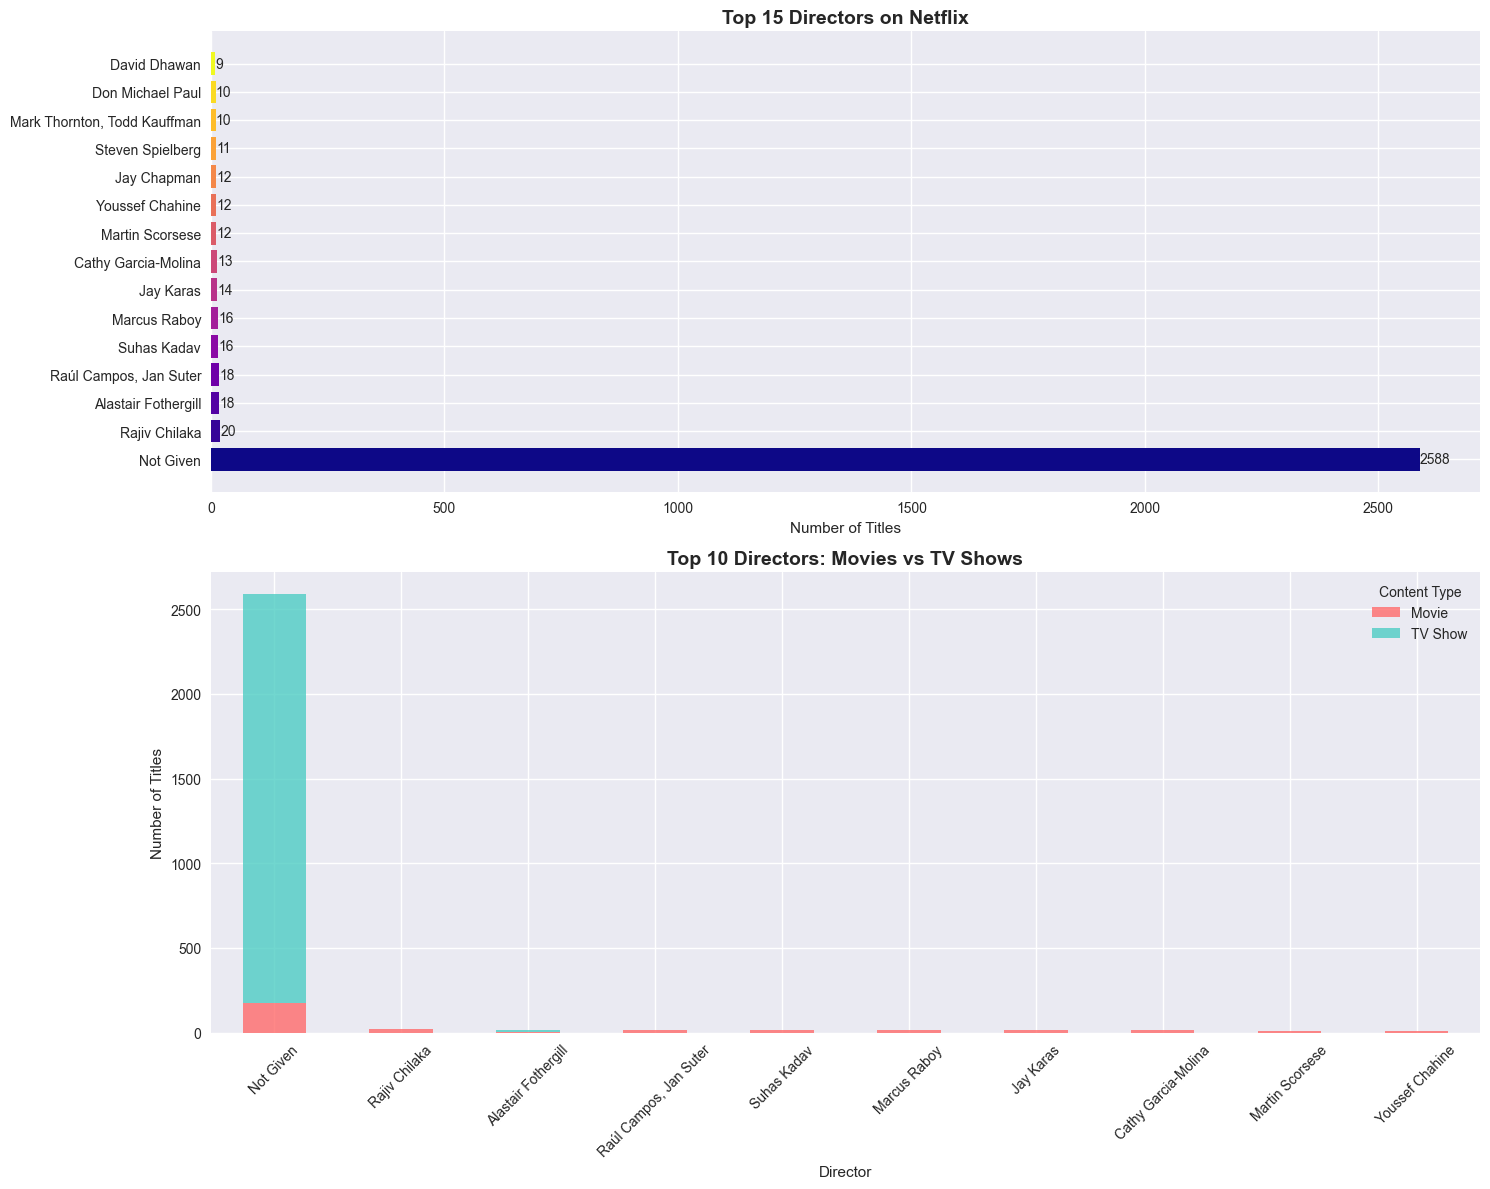


☁️ WORD CLOUD ANALYSIS


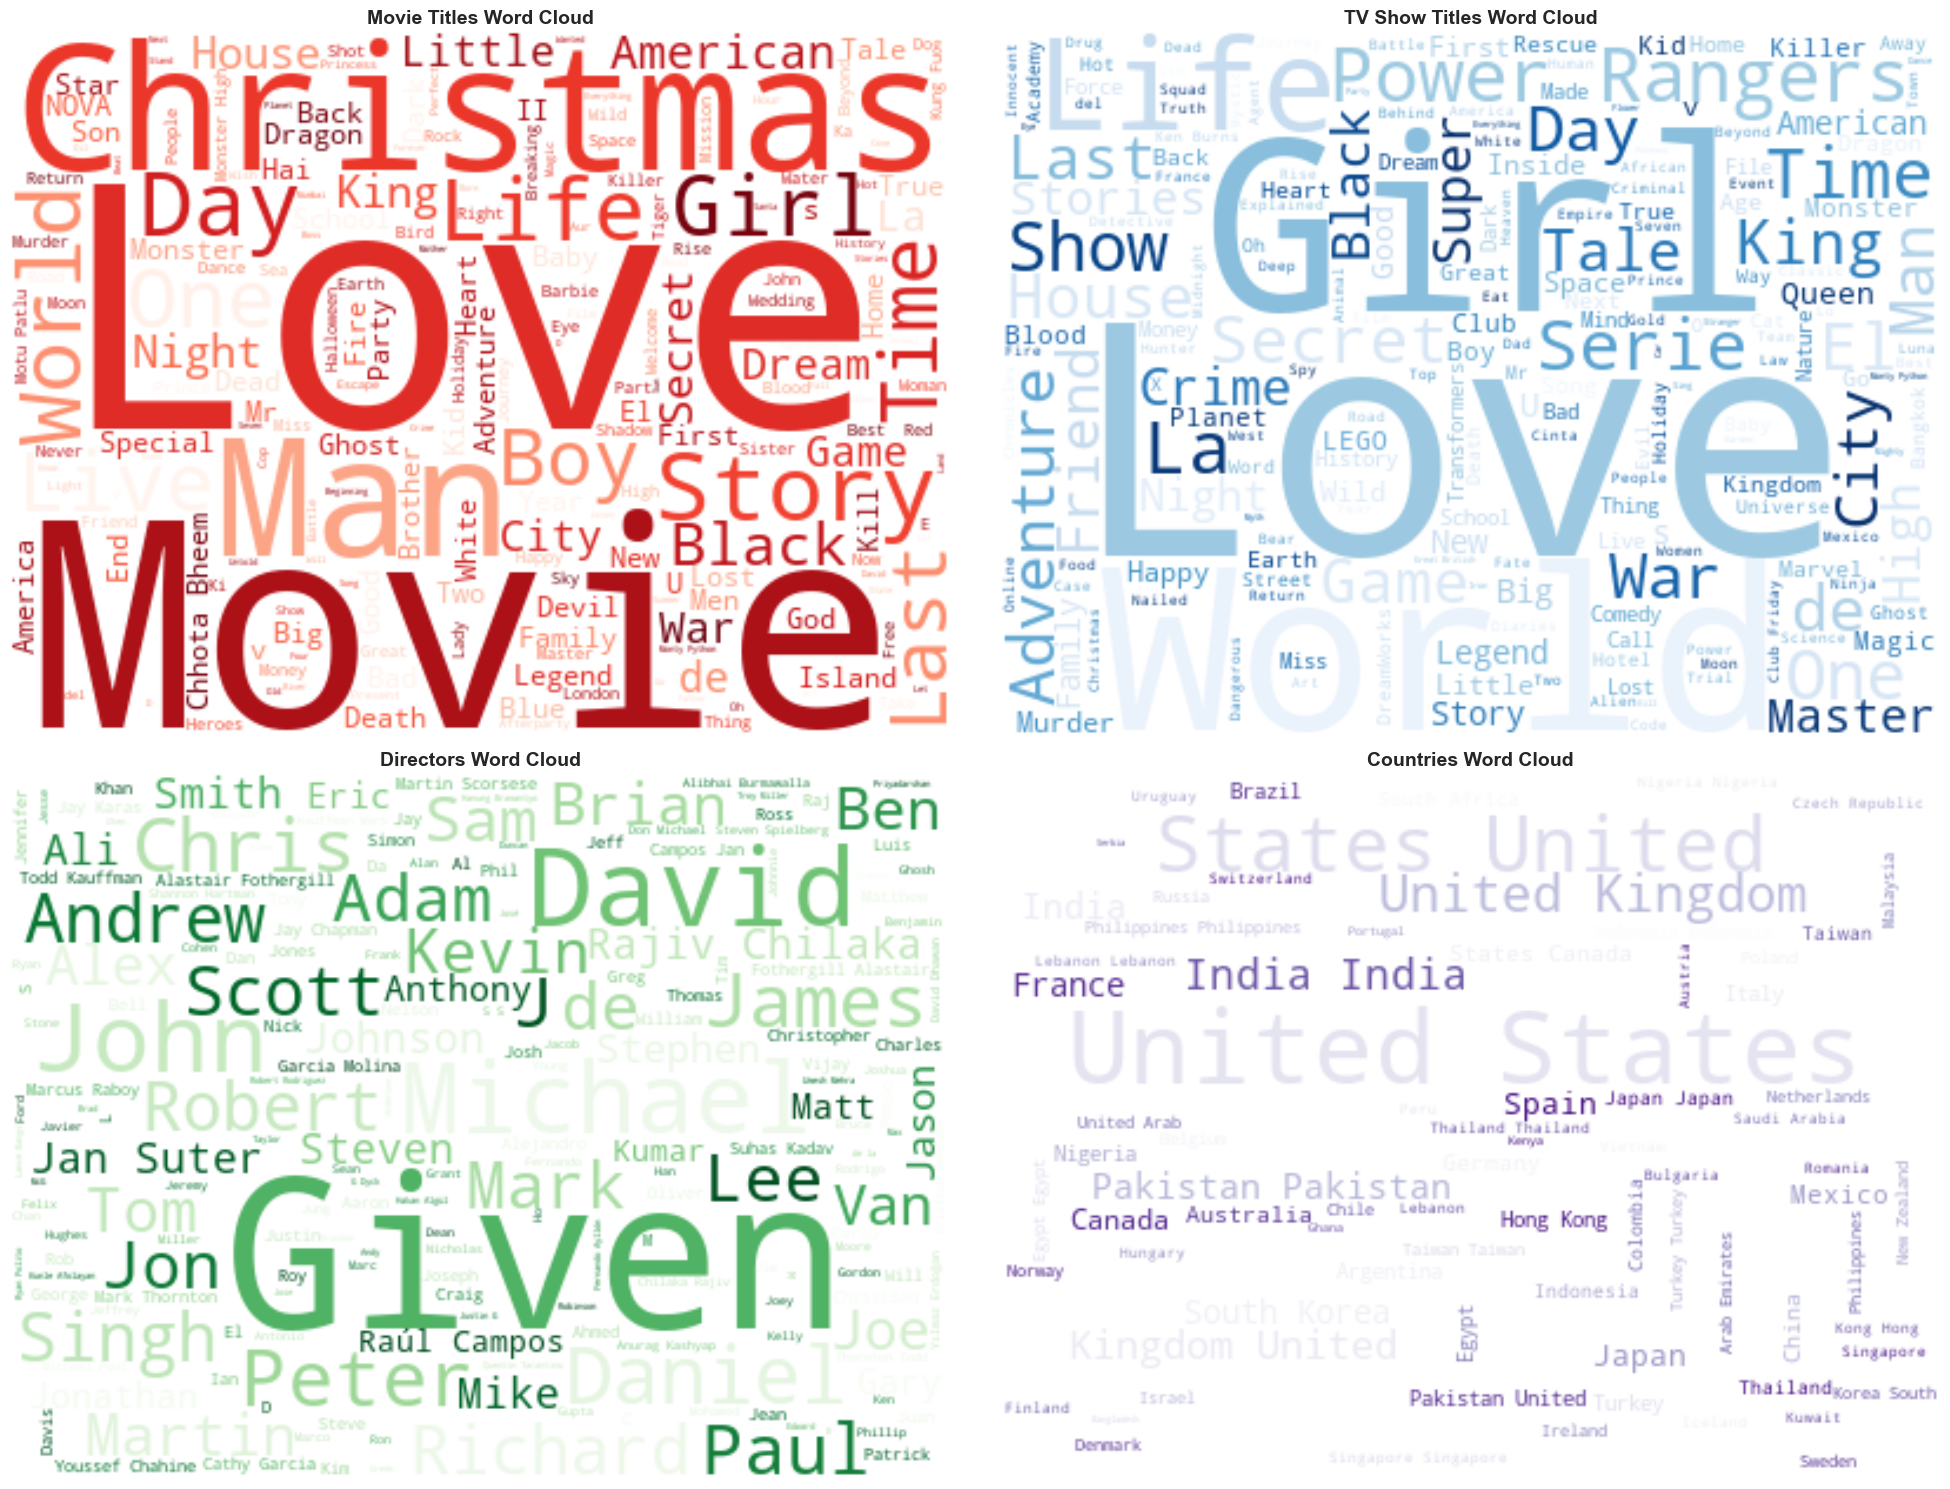


🔍 KEY INSIGHTS FROM NETFLIX DATA ANALYSIS
1. 📺 Movies make up 69.7% of Netflix content
2. 🌍 United States has the most content with 3240 titles
3. ⭐ Most common rating is 'TV-MA' with 3205 titles
4. 📅 Peak content addition year was 2019 with 2016 titles
5. 🎭 Most popular genre is 'International Movies' with 2752 appearances
6. 🎬 Most prolific director is 'Not Given' with 2588 titles
7. 📚 Content spans from 1925 to 2021

✨ Total dataset contains 8790 titles after cleaning

🎉 Analysis completed successfully!
Next steps for ML: Feature engineering, recommendation systems, trend prediction


In [50]:
analyzer = NetflixDataAnalyzer('netflix1.csv')
analyzer.run_complete_analysis()